In [ ]:
/#from google.colab import files
#uploaded = files.upload()


In [ ]:
import csv
import pandas as pd
file_name = "bank-additional-full.csv"
bankdf = pd.read_csv(file_name, sep=';')
bankdfog=pd.read_csv(file_name, sep=';')

age,
job,
marital,
education,
default,
housing,
loan,
contact,
month,
day_of_week,
duration,
campaign,
pdays,
previous,
poutcome,
emp.var.rate,
cons.price.idx,
cons.conf.idx,
euribor3m,
nr.employed,
y,



In [ ]:
bankdf.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
bankdf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print(bankdf['job'].unique())
print(bankdf['education'].unique())


['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [ ]:

import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
# Scale numeric features
scaler = StandardScaler()
numeric_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
bankdf[numeric_features] = scaler.fit_transform(bankdf[numeric_features])

bankdf.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,41188.000000,4.118800e+04
mean,-1.880382e-16,-1.397348e-17,-7.590531e-17,-2.580781e-16,5.520386e-18,7.797546e-17,-3.315820e-14,-1.352495e-16,0.000000,-1.024860e-14
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012,1.000012e+00
min,-2.209365e+00,-9.961775e-01,-5.659220e-01,-5.149443e+00,-3.494943e-01,-2.216433e+00,-2.374889e+00,-2.224953e+00,-1.722351,-2.815697e+00
25%,-7.699804e-01,-6.027745e-01,-5.659220e-01,1.954139e-01,-3.494943e-01,-1.197935e+00,-8.649547e-01,-4.747909e-01,-1.312994,-9.402810e-01
50%,-1.942267e-01,-3.019369e-01,-2.049085e-01,1.954139e-01,-3.494943e-01,6.480923e-01,2.994571e-01,-2.803284e-01,0.712460,3.316799e-01
75%,6.694038e-01,2.341712e-01,1.561049e-01,1.954139e-01,-3.494943e-01,8.390606e-01,7.227225e-01,8.864466e-01,0.772422,8.451701e-01
max,5.563310e+00,1.797202e+01,1.928982e+01,1.954139e-01,1.379492e+01,8.390606e-01,2.058168e+00,2.939106e+00,0.820853,8.451701e-01


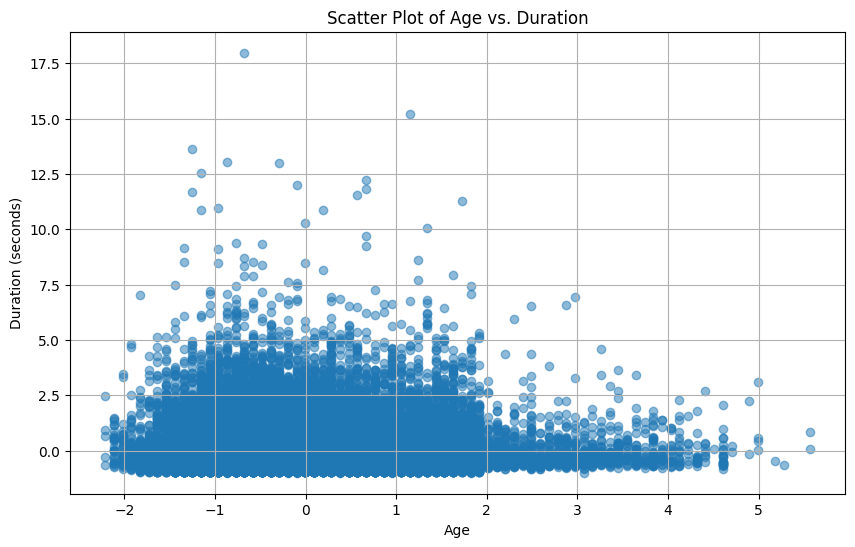

In [ ]:
# Scatter plot between 'age' and 'duration'
plt.figure(figsize=(10, 6))
plt.scatter(bankdf['age'], bankdf['duration'], alpha=0.5)  # alpha controls point transparency
plt.title('Scatter Plot of Age vs. Duration')
plt.xlabel('Age')
plt.ylabel('Duration (seconds)')
plt.grid(True)
plt.show()


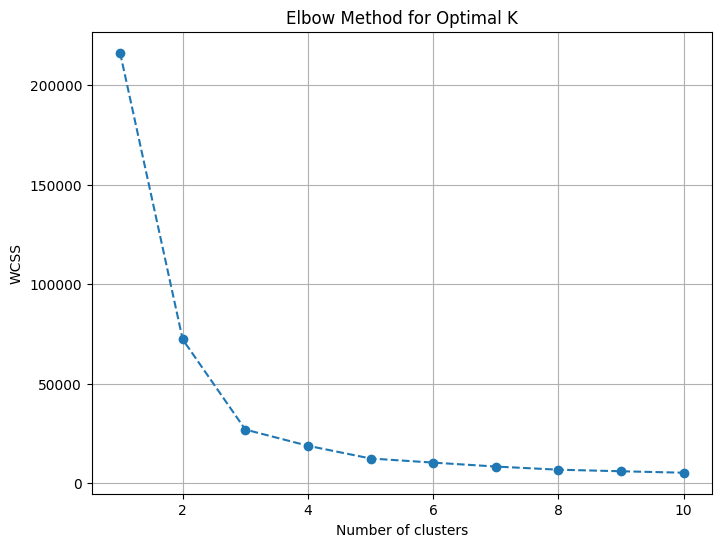

In [ ]:
# Select relevant features for clustering
X = bankdf[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Within-cluster sum of squares
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()



**As per the Graph the best vallue for the k is the 3. **


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[-1.2994307   0.16408006]
 [ 2.39052553 -0.97783384]
 [ 4.47139031  4.12879982]]
[0 0 0 ... 1 1 1]


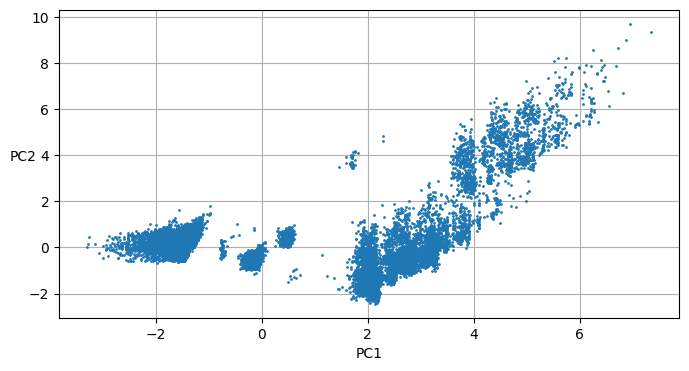

In [ ]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X_pca)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

# Define the plot_clusters function
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("PC1")
    plt.ylabel("PC2", rotation=0)
# Create the Elbow Method plot
plt.figure(figsize=(8, 4))
plot_clusters(X_pca)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

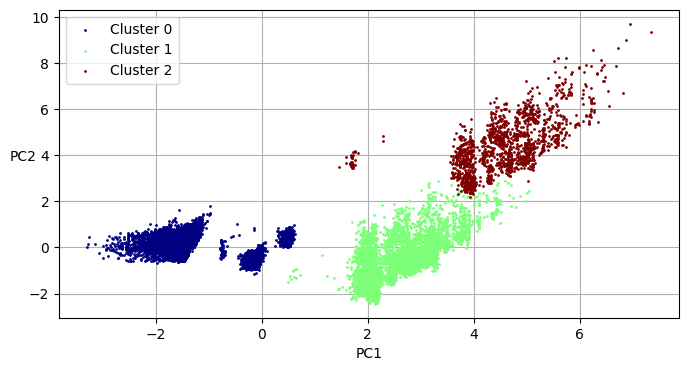

In [ ]:
# Select relevant features for clustering
X = bankdf[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
bankdf['cluster'] = kmeans.fit_predict(X)
bankdfog['cluster'] = kmeans.fit_predict(X)

# Define the plot_clusters function (updated for 2D data with cluster colors)
def plot_clusters(X, labels=None):
    # Create a colormap based on the number of clusters
    colors = plt.cm.jet(np.linspace(0, 1, len(np.unique(labels))))

    # Scatter plot the data points with different colors for each cluster
    for cluster_label in np.unique(labels):
        plt.scatter(X[labels == cluster_label, 0], X[labels == cluster_label, 1], c=[colors[cluster_label]], s=1, label=f'Cluster {cluster_label}')

    plt.xlabel("PC1")
    plt.ylabel("PC2", rotation=0)
    plt.legend()

# Create the Elbow Method plot with cluster colors
plt.figure(figsize=(8, 4))
plot_clusters(X_pca, kmeans.labels_)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()


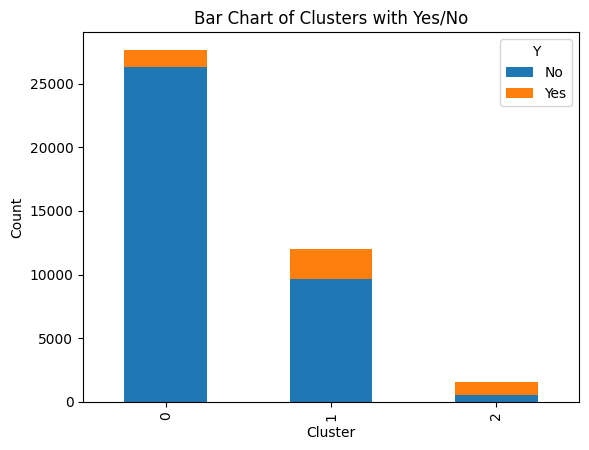

In [ ]:

counts = bankdf.groupby(['cluster', 'y']).size().unstack(fill_value=0)

ax = counts.plot(kind='bar', stacked=True)

plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Bar Chart of Clusters with Yes/No')
ax.legend(['No', 'Yes'], title='Y')
plt.show()



In [ ]:
bankdfog.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,cluster
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [ ]:
clus = bankdfog [['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','cluster']]
print(clus[bankdfog['cluster'] == 1].mean())

age                 39.393318
duration           263.639840
campaign             2.124802
pdays              999.000000
previous             0.317921
emp.var.rate        -2.025594
cons.price.idx      92.986577
cons.conf.idx      -43.189461
euribor3m            1.202373
nr.employed       5077.975115
cluster              1.000000
dtype: float64


In [ ]:
# Select the relevant features and target variable
X = bankdf[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'cluster']]
y = bankdf['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[7136  183]
 [ 519  400]]
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7319
         yes       0.69      0.44      0.53       919

    accuracy                           0.91      8238
   macro avg       0.81      0.71      0.74      8238
weighted avg       0.90      0.91      0.91      8238



In [ ]:
cluster1bankdf = bankdfog[bankdfog['cluster'] == 1]
cluster2bankdf = bankdfog[bankdfog['cluster'] == 2]
cluster0bankdf = bankdfog[bankdfog['cluster'] == 0]

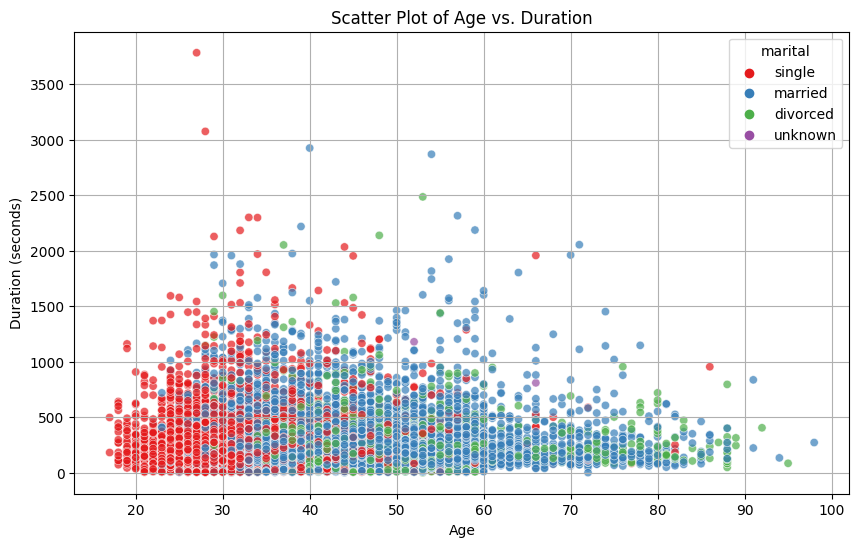

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='duration', hue='marital', data=cluster1bankdf, alpha=0.7, palette='Set1')
plt.title('Scatter Plot of Age vs. Duration')
plt.xlabel('Age')
plt.ylabel('Duration (seconds)')
plt.grid(True)
plt.show()

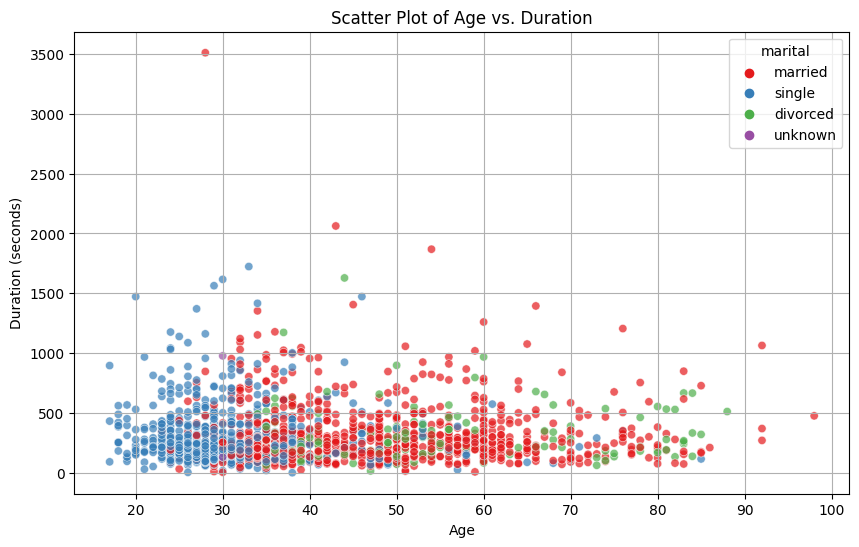

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='duration', hue='marital', data=cluster2bankdf, alpha=0.7, palette='Set1')
plt.title('Scatter Plot of Age vs. Duration')
plt.xlabel('Age')
plt.ylabel('Duration (seconds)')
plt.grid(True)
plt.show()

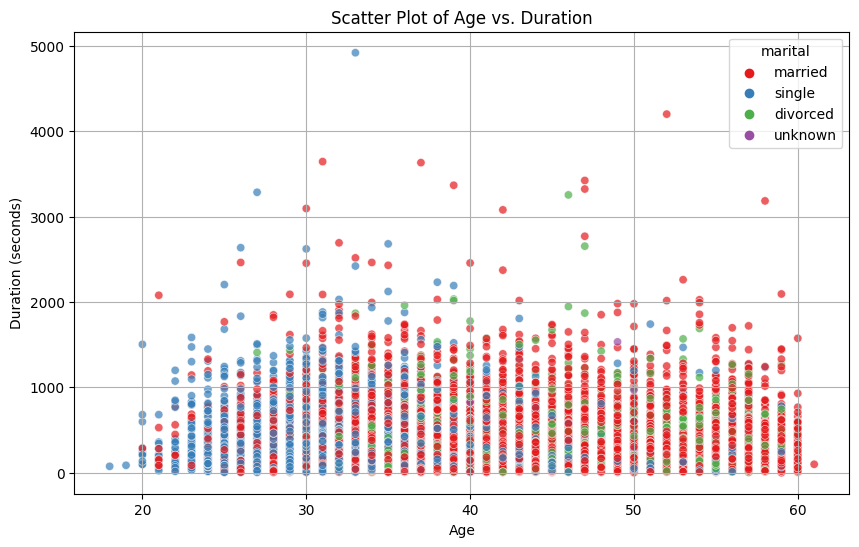

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='duration', hue='marital', data=cluster0bankdf, alpha=0.7, palette='Set1')
plt.title('Scatter Plot of Age vs. Duration')
plt.xlabel('Age')
plt.ylabel('Duration (seconds)')
plt.grid(True)
plt.show()

In [ ]:
cluster1bankdf.head()
a = cluster1bankdf[cluster1bankdf['y'] == 'yes'].shape[0]
b= cluster1bankdf.shape[0]
print(a)# no of term deposit customers
print(b) # no of customers
c=a/b
print (c)

2332
12003
0.19428476214279763


In [ ]:
cluster2bankdf.head()
a = cluster2bankdf[cluster2bankdf['y'] == 'yes'].shape[0]
b= cluster2bankdf.shape[0]
print(a)
print(b)
c=a/b
print (c)

973
1540
0.6318181818181818


In [ ]:
cluster0bankdf.head()
a = cluster0bankdf[cluster0bankdf['y'] == 'yes'].shape[0]
b= cluster0bankdf.shape[0]
print(a)
print(b)
c=a/b
print (c)

1335
27645
0.04829083016820401
